In [161]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [144]:
DF=pd.read_csv(r'C:\Users\avira\Desktop\Random Inspirations\CreditRisk.csv')
DF.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [145]:
DF.drop(columns=['Loan_ID'],inplace=True)

In [146]:
DF.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [147]:
DF.isnull().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [148]:
DF.Gender

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
976    Male
977    Male
978    Male
979    Male
980    Male
Name: Gender, Length: 981, dtype: object

In [149]:
DF.Gender=DF.Gender.fillna('Male')
DF.Married=DF.Married.fillna('Yes')
DF.Dependents=DF.Dependents.fillna(0.0)
DF.Self_Employed=DF.Self_Employed.fillna('No')
DF.Loan_Amount_Term=DF.Loan_Amount_Term.fillna(DF.Loan_Amount_Term.median())
DF.LoanAmount=DF.LoanAmount.fillna(DF.LoanAmount.median())
DF.Credit_History=DF.Credit_History.fillna(1.0)

In [150]:
DF.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [151]:
DF['Married'].value_counts()

Yes    634
No     347
Name: Married, dtype: int64

In [152]:
DF['Dependents'].value_counts()

0.0    570
2.0    160
1.0    160
4.0     90
3.0      1
Name: Dependents, dtype: int64

In [153]:
DF['Self_Employed'].value_counts()

No     862
Yes    119
Name: Self_Employed, dtype: int64

In [154]:
DF.Gender.replace({"Male" :1 , "Female":0} ,inplace = True)

In [155]:
DF.Married.replace({"No" :0 , "Yes":1} ,inplace = True)

In [156]:
lb=LabelEncoder()
DF.Education=lb.fit_transform(DF.Education)
DF.Self_Employed=lb.fit_transform(DF.Self_Employed)
DF.Property_Area=lb.fit_transform(DF.Property_Area)
DF.Loan_Status=lb.fit_transform(DF.Loan_Status)

In [157]:
DF.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,126.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [158]:
len(DF.describe().columns)

12

In [159]:
len(DF.columns)

12

In [160]:
X=DF.iloc[:,0:-1]
Y=DF.iloc[:,-1]

In [163]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X,Y,test_size=0.2)
del X
del Y

In [165]:
Xtrain = tf.keras.utils.normalize(np.array(Xtrain))
Xtest = tf.keras.utils.normalize(np.array(Xtest))

In [174]:
model=tf.keras.models.Sequential()
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [175]:
fit=model.fit(Xtrain,Ytrain,validation_split=0.1,epochs=128,batch_size=64)

Epoch 1/128
12/12 [==============================] - 0s 13ms/step - loss: 0.6303 - accuracy: 0.7177 - val_loss: 0.5351 - val_accuracy: 0.7848
Epoch 2/128
12/12 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.7177 - val_loss: 0.5257 - val_accuracy: 0.7848
Epoch 3/128
12/12 [==============================] - 0s 3ms/step - loss: 0.5938 - accuracy: 0.7177 - val_loss: 0.5490 - val_accuracy: 0.7848
Epoch 4/128
12/12 [==============================] - 0s 3ms/step - loss: 0.6020 - accuracy: 0.7177 - val_loss: 0.5609 - val_accuracy: 0.7848
Epoch 5/128
12/12 [==============================] - 0s 3ms/step - loss: 0.5984 - accuracy: 0.7177 - val_loss: 0.5301 - val_accuracy: 0.7848
Epoch 6/128
12/12 [==============================] - 0s 3ms/step - loss: 0.5921 - accuracy: 0.7177 - val_loss: 0.5213 - val_accuracy: 0.7848
Epoch 7/128
12/12 [==============================] - 0s 3ms/step - loss: 0.5949 - accuracy: 0.7177 - val_loss: 0.5246 - val_accuracy: 0.7848
Epoch 8/128


In [176]:
DFAnalysis=pd.DataFrame()

In [177]:
for i in fit.history.keys():
    DFAnalysis[i]=np.array(fit.history[i])


In [178]:
fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

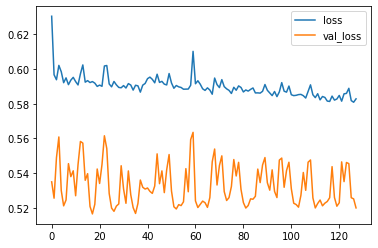

In [179]:
plt.plot(DFAnalysis['loss'],label='loss')
plt.plot(DFAnalysis['val_loss'],label='val_loss')
plt.legend()
plt.show()

[[  3  50]
 [  2 142]]


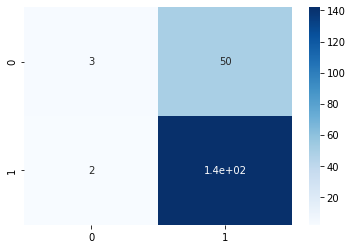

In [184]:
Y_pred = model.predict(Xtest)
Y_pred = np.argmax(Y_pred,axis=-1)
import seaborn as sns
cf_matrix = confusion_matrix(Ytest, Y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.show()